# NFT DataCrunch League - BitsCrunch (Bronze Edition)

> **INTERPRETATION OF PROBLEM STATEMENT AND BRIEF SUMMARY OF THE IDEAS IMPLEMENTED :**  

The official problem statement can be broken down to the following 3 tasks


---



1.   Extracting the tweets regarding the NFTs from the past 6 months
2.   Indentify the trending NFTs
3.   Perform Sentiment anaLysis of the correspondings tweets of the trending NFTs



---

PART 1 : SCRAPING THE TWEETS REGARDING NFTs 

(REFER THE PYTHON FILE NAMED tweet_scrape.py FOR LOOKING AT THE IMPLEMENTATION OF CODE FOR SCRAPING TWEETS) 

*   Package used - Twint
*   Scraped all the tweets which have any of the hashtags mentioned in the problem statement from 01-01-2021 to 24-03-2022 with min 100 likes (As we are interested in the trending nfts we can ignore tweets with less than 100 likes)
*   Scareped all the tweets which mentions any of the top 10 NFT market places  with min 100 likes. (As we are interested in the trending nfts we can ignore tweets with less than 100 likes)

Common Issues faced while using twint and their solutions:
1. Not able to scrape tweets older than 1 day. ( ie. Configure.Since and Configue.Untill not working.


> Solution : [link text](https://github.com/twintproject/twint/issues/1261). Make the corresponding changes to the user.py file in the source code of twint.


2. Not able to extract user information of usernames of our choice



> Solution :[link text](https://github.com/twintproject/twint/issues/1003) 
make the corresponding changes to the user.py file in the source code of twint

NOTE : It was noted that the twint works better from the comand line than python file. and while running from python file it was noted that using linux solves many of the issues. By following these procedures I was able to scrape around 90k tweets with more than 100 likes from 01-01-2021 to 24-03-2021

NFT_tweet_1_year.csv : contains all the tweets with the hashtags mentioned in the problem statement 

NFT_tweet_1_year_mp.csv :  contains all the tweets which metions the top 10 NFT market place 


---



PART 2 :  IDENTIFY THE TRENDING NFTs

This notebook contains the code for Identifying the trending NFTs and Performing the Sentiment Analysis. Selecting trending Nfts from the tweets can be broken down to the following tasks.


> FILTER OUT TWEETS ABOUT GENERAL OPININIONS ON NFTs, NFT GIVEAWAY AND OTHER IRRELEVANT TWEETS AND ONLY SELECTING TWEETS PROMOTING AN NFT ASSEST OR COLLECTION.

The scraped tweets contains all kinds of tweets about nfts like people's opinion , nft giveaways , tweets regarding seminar/webinars on nfts/blockchain etc. We need to filter these kind of tweets to select only the tweets promoting a particular NFT as only then we would be able to look at some interesting relationships that would be described in the notebook named as Additional_analysis.ipynb

I observed that the tweets promoting an asset or collection contains a link to the corresponding NFT marketplace , so we can filter out the irrelevent tweets by selecting only tweets containing links to marketplace. This can be done by a search for the names of top 10 nft market place in the urls
The names of the nft collection can be extracted from the structure of their corresponding urls.




> DEFINING THE TERM TRENDING
 
 I didn't find any explaination/ definition for trending tweets. But we need a metric to compare two tweets on which tweet can be called more trending than the others. I have chosen to give the preference for tweets with highest number of likes count, retweet count and replies count in the mentioned order of significance. using this metric we will be able to compare two tweets and rank them accordingly.

Top_10 : top 10 trending tweets promoting nft assets or collection from 01-01-2021 to 24-03-2022 is stored in the dataframe called as Top_10


SA_data : dataframe created by selection only the required columns from Top_10.
These are the tweets whose sentiments are analysed.





---


PART 3: SENTIMENT ANALYSIS

The sentiments of the tweets are analysed using pretrained language models.
the sentiment analysis can be broken down to the following tasks.

1.  Translation: The collected tweets are in many different languages, we should translate iti into english as the accuracy of most of the sentiment analysis models avaiable have best performance when the text is in english. I have used GoogleTranslate from the deep translate package for trslating the tweets to english.

2. Pre-processing the tweets : The collected tweets have many elements like links, emoticons( emoticons actually gives a very good insight to the sentiments of the tweets, unfortunately it reduces the accuracy of the sentiment analysis models trained on texts. In a model finding the sentiments of the emoticons can be added in parralel to this step in the future.) Converting all the text to lowercase, removing hastags and @ etc.

3. Using Pretrained models to get the sentiments of the tweets.



---


PART 4: Additional Analysis and Inference. 

As we have collected this large amount of data , this puts us in a good position to look at some very interesting question on the NFT markets. 
I have tried to look at the following questions / relationships.

(REFER TO THE PYTHON FILE: Aditional_analysis.py for details and code on the Analysis for getting deeper insights into NFT market.


> Additional steps :

1. Group the daily top 10 tweets based on date. 
2. Collect the unique usernames that have most frequently generated trending NFTs
3. Use these usernames to collect extra information from twint like the number of followers, joined date, location,  bio etc. 
4. Group the NFTs posted at opensea on the bassis of whether its an asset or collection
5. Scrape the prices of each NFT collection , The price of assets are not included in the analysis because random events could play a higher role in the pricing on individual assests but I think that the role of random events on the average price of a collection would be far less and the analysis of the influence of social media features on the average price of NFT collections could give us deeper insights to the NFT market.
( REFER TO THE PYTHON FILE:  opensea_scrape.py for looking at the code for scraping the price of NFT collection of our choice.)





> Some of the Interesting analysis I have looked at:

1. Does social media presence have a significant influence on the Valuation of an NFT collection?

2. What are the hashtags associatted with the best trending NFTs?

3. What are the locations which produced most number of trending NFTs?

And so on...


Detailed explaination of these analysis and code is in the python file titled Addtional_analysis.py 












                          

















## SECTION 1:


> LOADING THE COLLECTED TWEETS AND PRIMARY DATA ANALYSIS



In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

Loading the data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NFT_twitter/Submission_twint_1_year/NFT_tweet_1_year.csv') #  Tweets collected with the hashtags mentioned in the problem statement with minimum 100 likes  and over a period from 01-01-2021 to 24-03-2022
data_mp = pd.read_csv('/content/drive/MyDrive/NFT_twitter/Submission_twint_1_year/NFT_tweet_1_year_mp.csv') # Tweets which mentiones top 10 NFT market places with minimum 100 likes and over a period from 01-01-2021 to 24-03-2022
dataset = pd.concat([data, data_mp], ignore_index = True) # merging the two data sets together
print("Number of tweets = ", dataset.shape[0])
print("Number of Features = ", dataset.shape[1])


Number of tweets =  94954
Number of Features =  36


In [ ]:
# prinitng the primary information about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94954 entries, 0 to 94953
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               94954 non-null  int64  
 1   conversation_id  94954 non-null  int64  
 2   created_at       94954 non-null  object 
 3   date             94954 non-null  object 
 4   time             94954 non-null  object 
 5   timezone         94954 non-null  int64  
 6   user_id          94954 non-null  int64  
 7   username         94954 non-null  object 
 8   name             94954 non-null  object 
 9   place            0 non-null      float64
 10  tweet            94954 non-null  object 
 11  language         94954 non-null  object 
 12  mentions         94954 non-null  object 
 13  urls             94954 non-null  object 
 14  photos           94954 non-null  object 
 15  replies_count    94954 non-null  int64  
 16  retweets_count   94954 non-null  int64  
 17  likes_count 

In [ ]:
# finding the number of unique entries for each column
counts = dataset.nunique()
print(counts)

id                 84318
conversation_id    84056
created_at         83901
date                 448
time               51854
timezone               1
user_id            25106
username           25106
name               24914
place                  0
tweet              84317
language              41
mentions           22325
urls               27125
photos             70121
replies_count       2634
retweets_count      3891
likes_count         4407
hashtags           43923
cashtags            2115
link               84318
retweet                1
quote_url            780
video                  2
thumbnail          83882
near                   0
geo                    0
source                 0
user_rt_id             0
user_rt                0
retweet_id             0
reply_to             205
retweet_date           0
translate              0
trans_src              0
trans_dest             0
dtype: int64


## SECTION 2: 


> FINDING THE TRENDING TWEETS ON A DAILY BASIS





Selecting the tweets promoting a particular NFT asset/collection and filter out the other tweets which might be about NFT giveaways, twwets about people's opinion on NFTs, Tweets about NFT/Blockchain workshops/seminars/ webinars 
etc.

I noticed that the tweets promoting the a particluar NFT collection/asset usually contains its corresponding link to the NFT marketplace. This can be used to filter out the Irrelevant tweets in this case



In [ ]:
# dropping tweets which donot contain an url
dataset = dataset.drop(dataset[dataset['urls'] == '[]'].index , axis = 0)
dataset.shape

(38496, 36)

In [ ]:
# Searching for the presence of the name of top 10 nft market places in the link
marketplace = []

urls = dataset['urls'].values.tolist()
for i in range(len(urls)):
  keywords = ['opensea', 'rarible', 'larvalab', 'decentraland', 'superrare', 'mintable', 'knownorigin','axieinfinity']
  a = [word for word in keywords if(word in urls[i])]
  marketplace.append(bool(a))

dataset['marketplace'] = marketplace
#dropping the tweets if it doesn't have nft market-place link
dataset = dataset.drop(dataset[dataset['marketplace'] == False].index , axis = 0)
dataset.reset_index(inplace = True)

mp =[]
urls = dataset['urls'].values.tolist()
for i in range(len(urls)):
  for character in "[]' '":
    urls[i] = str(urls[i]).replace(character, '')
  urls[i]= list(urls[i].split(","))


for i in range(len(urls)):
  keywords = ['opensea', 'rarible', 'larvalab', 'decentraland', 'superrare', 'mintable', 'knownorigin','axieinfinity']
  for word in keywords:
    for j in range(len(urls[i])):
      if (word in str(urls[i][j])):
        a = word
        dataset['marketplace'][i] = a
        dataset['urls'][i] = urls[i][j]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
dataset['marketplace'].value_counts()

opensea         12489
superrare        2721
knownorigin       617
rarible           491
decentraland      143
axieinfinity       73
larvalab           67
mintable           15
Name: marketplace, dtype: int64

NOTE : It is observed that most of the NFTs are on the opeansea NFT marketplace. So while modelling the influence of Socila media features on NFT valuation I will be only looking at the opensea market place

In [ ]:
# Defining the measure to compare two tweets  and sort them in the order of trending
#the preference is given in the order of Number of likes, No. of Retweets, No.of replies
 
dataset['date'] = pd.to_datetime(dataset['date']).dt.date
dataset.sort_values(by=['date', 'likes_count', 'retweets_count', 'replies_count'], inplace = True, ascending =False)

In [ ]:
# finding the number of unique entries in the edited dataframe
counts = dataset.nunique()
print(counts)

index              16616
id                 11061
conversation_id    11000
created_at         11053
date                 447
time               10150
timezone               1
user_id             4047
username            4047
name                4033
place                  0
tweet              11061
language              26
mentions            1853
urls                8581
photos              9028
replies_count        516
retweets_count       795
likes_count         1251
hashtags            4974
cashtags              78
link               11061
retweet                1
quote_url            134
video                  2
thumbnail          11059
near                   0
geo                    0
source                 0
user_rt_id             0
user_rt                0
retweet_id             0
reply_to              10
retweet_date           0
translate              0
trans_src              0
trans_dest             0
marketplace            8
dtype: int64


In [ ]:
# finding out the frequency of each language 
dataset['language'].value_counts()

en     15650
ja       489
und      133
fr        65
et        45
fi        28
ko        28
cy        27
th        19
es        16
in        15
cs        14
de        14
ro        13
tr        12
ht        11
tl        10
vi         4
sl         4
ca         4
lt         3
da         3
ru         3
no         3
pt         2
nl         1
Name: language, dtype: int64

In [ ]:
# deleting the irrelelavnt features 
del dataset['video']
del dataset['trans_dest']
del dataset['trans_src']
del dataset['translate']
del dataset['retweet_id']
del dataset['near']
del dataset['geo']
del dataset['source']
del dataset['user_rt']

del dataset['user_rt_id']

In [ ]:
# deleting the copies of the same tweets collected/ tweets with the same links to the marketplace
dataset.drop_duplicates(subset = ['urls'],keep = 'first',inplace=True)


In [ ]:
# sorting the tweets 
grouped_dataset = dataset.sort_values(['date', 'likes_count', 'retweets_count','replies_count' ], ascending=False).groupby('date')

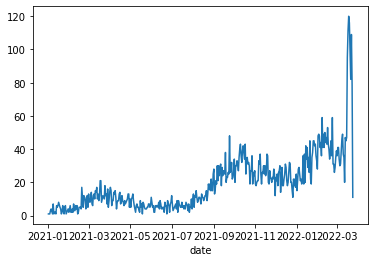

In [ ]:
# plotting the number of tweets with media files, links to nft marketplace with above 100 likes from these hashtags in the given time duration
grouped_dataset.size().plot()

This plot shows the trend in daily number of tweets with media file, minimum likes greater than 100, and with links to an nft market place. This gives us an idea of the rise of popularity of NFTs over that past 1 year

In [ ]:
# top_10 is the dataframe containing the top 10 trending NFTs on eachday
top_10 = grouped_dataset.head(10).reset_index()
top_10.shape

(3670, 29)

In [ ]:
top_10.head(5)

,level_0,index,id,conversation_id,created_at,date,time,timezone,user_id,username,...,likes_count,hashtags,cashtags,link,retweet,quote_url,thumbnail,reply_to,retweet_date,marketplace
0,8480,74854,1506703960714919937,1506703960714919937,2022-03-24 00:16:32 India Standard Time,2022-03-24,00:16:32,530,1355080873654300674,aquanft,...,1689,['skulltakeover'],[],https://twitter.com/AquaNFT/status/15067039607...,False,NaN,https://pbs.twimg.com/media/FOjjRFMXwBASb90.jpg,[],NaN,opensea
1,8466,74834,1506747694227808261,1506747694227808261,2022-03-24 03:10:18 India Standard Time,2022-03-24,03:10:18,530,200070195,cryptoarthur92,...,361,"['nft', 'nftcollection', 'nftcommunity', 'dyor']",[],https://twitter.com/cryptoarthur92/status/1506...,False,NaN,https://pbs.twimg.com/media/FOkLCYIXEAEIvc7.jpg,[],NaN,opensea
2,8475,74847,1506709863795236867,1506709863795236867,2022-03-24 00:39:59 India Standard Time,2022-03-24,00:39:59,530,1497664589638647812,shryxsi,...,226,['skulltakeover'],[],https://twitter.com/shryxsi/status/15067098637...,False,NaN,https://pbs.twimg.com/media/FOjoiFXXIAM0T1T.png,[],NaN,opensea
3,8471,74843,1506717279622467589,1506717279622467589,2022-03-24 01:09:27 India Standard Time,2022-03-24,01:09:27,530,3073393115,camila_artwork,...,222,[],[],https://twitter.com/camila_artwork/status/1506...,False,NaN,https://pbs.twimg.com/media/FOjvSM0XwAAcKdI.jpg,[],NaN,superrare
4,8467,74837,1506738005712773126,1506726681125564416,2022-03-24 02:31:49 India Standard Time,2022-03-24,02:31:49,530,3291830170,decentraland,...,170,[],[],https://twitter.com/decentraland/status/150673...,False,NaN,https://pbs.twimg.com/media/FOkBhGSXsAE3O7c.jpg,"[{'screen_name': 'Selfridges', 'name': 'Selfri...",NaN,decentraland


## SECTION 3:


> Sentiment Analysis

In this Section I will be executing the following tasks
1. Translating non english tweets to english
2. Clean to tweets by removing urls, hashtags, emoticons etc
3. Perform sentiment analysis using HuggingFace Transformers
4. Perform Sentiment Analysis using TextBlob
5. Perform Sentiment Analysis using Aspect based sentiment analysis
6. Compare the results of all the sentiment analysis.


top_10 :

dataframe containing the rows corresponding to top 10 trending tweets related to nfts containing a media file with linkt to an nft marketplace ( assuming that the existence of a media file increases the probability of the tweet corresponding to promoting a particular nft and not a general tweet about nfts/blockchain.

In [ ]:
SA_data = top_10[['date','username','urls', 'hashtags', 'replies_count','retweets_count','likes_count','tweet','language','marketplace']].copy()
SA_data.head(5)
#SA_data is a subset of top_10 with only the relevant features
#I will be performing sentiment analysis on the tweets in SA_data

,date,username,urls,hashtags,replies_count,retweets_count,likes_count,tweet,language,marketplace
0,2022-03-24,aquanft,https://opensea.io/collection/skulltoonsbytheo...,['skulltakeover'],233,1690,1689,OMG @SkulltoonsNFT reveal GOES CRAZY 🤯 😱 💎 Go...,en,opensea
1,2022-03-24,cryptoarthur92,http://opensea.io/collection/the-lamp-project,"['nft', 'nftcollection', 'nftcommunity', 'dyor']",6,318,361,Debut Artist Project: The Lamp Project - Colle...,en,opensea
2,2022-03-24,shryxsi,http://opensea.io/collection/skulltoonsbytheodoru,['skulltakeover'],217,83,226,YESSIR @SkulltoonsNFT reveal IS GOING CRAZY FR...,en,opensea
3,2022-03-24,camila_artwork,https://superrare.com/0x3f95f48b99f864913f697e...,[],31,39,222,"""Cloud 9"" is up at @superrare! 🔥 A collab with...",en,superrare
4,2022-03-24,decentraland,https://play.decentraland.org/?island=Io9c&pos...,[],6,22,170,@Selfridges Jump in here! 👇🎉 https://t.co/FeL...,en,decentraland



### 1. Sentiment analysis using HuggingFace Transformers



I will be using the pre-trained hugging face transformers for sentiment analysis
we can check the results of sentiment analysis for both raw scraped tweets and after cleaning and pre-processing the tweets

In [ ]:
# installing transformers
! pip install transformers
from transformers import pipeline

#### Sentiment Analysis of Raw tweets

In [ ]:
sentiment_classifier = pipeline('sentiment-analysis')
tweet_list = SA_data['tweet'].tolist()

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [ ]:
results = sentiment_classifier(tweet_list)


In [ ]:
Sentiment = []
Score = []
for i in range(len(results)):
  Sentiment.append(results[i]['label'])
  Score.append(results[i]['score'])

In [ ]:
SA_data['Raw_Sentiment'] = Sentiment
SA_data['Raw_Score'] = Score

In [ ]:
SA_data.head(5)

,date,username,urls,hashtags,replies_count,retweets_count,likes_count,tweet,language,marketplace,Raw_Sentiment,Raw_Score
0,2022-03-24,aquanft,https://opensea.io/collection/skulltoonsbytheo...,['skulltakeover'],233,1690,1689,OMG @SkulltoonsNFT reveal GOES CRAZY 🤯 😱 💎 Go...,en,opensea,NEGATIVE,0.996016
1,2022-03-24,cryptoarthur92,http://opensea.io/collection/the-lamp-project,"['nft', 'nftcollection', 'nftcommunity', 'dyor']",6,318,361,Debut Artist Project: The Lamp Project - Colle...,en,opensea,POSITIVE,0.992111
2,2022-03-24,shryxsi,http://opensea.io/collection/skulltoonsbytheodoru,['skulltakeover'],217,83,226,YESSIR @SkulltoonsNFT reveal IS GOING CRAZY FR...,en,opensea,NEGATIVE,0.995752
3,2022-03-24,camila_artwork,https://superrare.com/0x3f95f48b99f864913f697e...,[],31,39,222,"""Cloud 9"" is up at @superrare! 🔥 A collab with...",en,superrare,POSITIVE,0.998996
4,2022-03-24,decentraland,https://play.decentraland.org/?island=Io9c&pos...,[],6,22,170,@Selfridges Jump in here! 👇🎉 https://t.co/FeL...,en,decentraland,NEGATIVE,0.987673


In [ ]:
# prininting a few tweets and its estimated sentiments
for i in range(1):
  print(SA_data['tweet'][i])
  print(SA_data['Raw_Sentiment'][i])
  print("\n")

OMG @SkulltoonsNFT reveal GOES CRAZY 🤯 😱 💎  Go check their Opensea right now! #SKULLTAKEOVER   https://t.co/8rycCeK7CL  https://t.co/GL1PU46KAr
NEGATIVE




#### Preprocessing The tweets

We can now see how the sentiment analysis improves with processed / cleaned tweets


*   Removing twitter handles
*   Removing URLs
*   Removing Punctuations
*   Removing stopwords
*   Translating the non english tweets to english
*   Removing emojis
*   Removing Hashtags







In [ ]:
# importing relevant packages/libraries required for cleaning the tweets
import nltk
from nltk.corpus import stopwords                                                           
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
import random
import re
!pip install tweet-preprocessor
import preprocessor as p

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
! pip install deep-translator
from deep_translator import GoogleTranslator

In [ ]:
clean_tweet = []
tweets = SA_data['tweet'].values.tolist()
for i in range(len(tweets)):
  #remove hyperlinks
  tweets[i] = re.sub(r'https?:\/\/.*[\r\n]*', '', tweets[i])

  #removing the hash # and @ sign from the word
  tweets[i] = re.sub(r'#|@', '', tweets[i])

  # remove single numeric terms in the tweet. 
  tweets[i] = re.sub(r'[0-9]', '', tweets[i])
  c = 0 
  if SA_data['language'][i] != "en":
    # translating non-english tweets to english
    temp = GoogleTranslator(source='auto', target='en').translate(tweets[i])
    tweets[i] = str(temp)
    c = c+1
  
  clean_tweet.append(p.clean(tweets[i]))

SA_data['Clean_Tweet'] = clean_tweet
SA_data['Clean_Tweet'] = SA_data['Clean_Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ') # lowrcase and other small cleaning process 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
hh =[]
for i in range(len(tweets)):
  if SA_data['language'][i] != "en":
    hh.append(i)

hh[18]

207

In [ ]:
print("Original tweet :  ",SA_data['tweet'][207])
print("Clean tweet :  ",SA_data['Clean_Tweet'][207])    

Original tweet :   #NFT はじめました  https://t.co/CPJ1nPGeTS  https://t.co/RlQXPSrh4a
Clean tweet :   i started nft


In [ ]:
results = sentiment_classifier(clean_tweet)
Sentiment = []
Score = []
for i in range(len(results)):
  Sentiment.append(results[i]['label'])
  Score.append(results[i]['score'])

SA_data['Clean_Sentiment_HF'] = Sentiment # clean_sentiments: Sentiments analysed on cleaned tweets using HuggingFace transformers 

In [ ]:
SA_data.head(5) # looking at 5 entries of SA_data to get an idea of what we are dealing with

,date,username,urls,hashtags,replies_count,retweets_count,likes_count,tweet,language,marketplace,Raw_Sentiment,Raw_Score,Clean_Tweet,Clean_Sentiment_HF
0,2022-03-24,aquanft,https://opensea.io/collection/skulltoonsbytheo...,['skulltakeover'],233,1690,1689,OMG @SkulltoonsNFT reveal GOES CRAZY 🤯 😱 💎 Go...,en,opensea,NEGATIVE,0.996016,omg skulltoonsnft reveal goes crazy go check t...,NEGATIVE
1,2022-03-24,cryptoarthur92,http://opensea.io/collection/the-lamp-project,"['nft', 'nftcollection', 'nftcommunity', 'dyor']",6,318,361,Debut Artist Project: The Lamp Project - Colle...,en,opensea,POSITIVE,0.992111,debut artist project the lamp project collecti...,POSITIVE
2,2022-03-24,shryxsi,http://opensea.io/collection/skulltoonsbytheodoru,['skulltakeover'],217,83,226,YESSIR @SkulltoonsNFT reveal IS GOING CRAZY FR...,en,opensea,NEGATIVE,0.995752,yessir skulltoonsnft reveal is going crazy fre...,NEGATIVE
3,2022-03-24,camila_artwork,https://superrare.com/0x3f95f48b99f864913f697e...,[],31,39,222,"""Cloud 9"" is up at @superrare! 🔥 A collab with...",en,superrare,POSITIVE,0.998996,cloud is up at superrare a collab with worldo...,POSITIVE
4,2022-03-24,decentraland,https://play.decentraland.org/?island=Io9c&pos...,[],6,22,170,@Selfridges Jump in here! 👇🎉 https://t.co/FeL...,en,decentraland,NEGATIVE,0.987673,selfridges jump in here,POSITIVE


In [ ]:
for i in range(5):
  print(SA_data['Clean_Tweet'][i])
  print(SA_data['Clean_Sentiment_HF'][i])
  print("\n")

omg skulltoonsnft reveal goes crazy go check their opensea right now skulltakeover
NEGATIVE


debut artist project the lamp project collection now available on opensea
POSITIVE


yessir skulltoonsnft reveal is going crazy frens go check their opensea right now 
NEGATIVE


 cloud is up at superrare a collab with worldofwomennft x sr for women s history month and the of my dreamcatcher animated series i m so proud of this one
POSITIVE


selfridges jump in here 
POSITIVE




In [ ]:
# Finding the count of postive and negative sentiment for sentiments analysed on raw scraped tweets 
SA_data['Raw_Sentiment'].value_counts()

NEGATIVE    2456
POSITIVE    1214
Name: Raw_Sentiment, dtype: int64

In [ ]:
# Finding the count of postive and negative sentiment for sentiments analysed on cleaned preprocessed tweets
SA_data['Clean_Sentiment_HF'].value_counts()

POSITIVE    2004
NEGATIVE    1666
Name: Clean_Sentiment_HF, dtype: int64

**NOTE** : *We know that Most of the tweets promoting NFTs are of positive sentiment , Thus pre-processing the raw scraped tweets before sentiment analysis has improveved the prediction by a reasonable amount. This might be because the model has been classifying the emoticons , urls, #, @ as negative elements.*

### 2. Sentiment Analysis using TextBlob

In [ ]:
from textblob import TextBlob
data = TextBlob(SA_data['Clean_Tweet'][1])
print("Tweet : ", SA_data['Clean_Tweet'][1])
print("Sentiment :", data.sentiment)

Tweet :  debut artist project the lamp project collection now available on opensea
Sentiment : Sentiment(polarity=0.4, subjectivity=0.4)


*NOTE* : *We can see the output is categorized between two — Polarity and Subjectivity.
Polarity is a float value within the range [-1.0 to 1.0] where 0 indicates neutral, +1 indicates a very positive sentiment and -1 represents a very negative sentiment.
Subjectivity is a float value within the range [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective. Subjective sentence expresses some personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations where as Objective sentences are factual.* 

In [ ]:

Sentiment = []
clean_tweet = SA_data['Clean_Tweet'].values.tolist()
for i in range(len(clean_tweet)):
  data = TextBlob(clean_tweet[i])
  Sentiment.append(data.sentiment[0])

c_Sentiment= []
for i in range(len(Sentiment)):
  if -1<= Sentiment[i] < - 0.1 :
    a = 'NEGATIVE'
  if - 0.1 <= Sentiment[i] < 0.1 :
    a = 'NEUTRAL'
  else:
    a = 'POSITIVE'
  c_Sentiment.append(a)
SA_data['Clean_Sentiment_TB'] = c_Sentiment 

In [ ]:
for i in range(5):
  print(SA_data['Clean_Tweet'][i])
  print(SA_data['Clean_Sentiment_TB'][i])
  print("\n")

omg skulltoonsnft reveal goes crazy go check their opensea right now skulltakeover
POSITIVE


debut artist project the lamp project collection now available on opensea
POSITIVE


yessir skulltoonsnft reveal is going crazy frens go check their opensea right now 
POSITIVE


 cloud is up at superrare a collab with worldofwomennft x sr for women s history month and the of my dreamcatcher animated series i m so proud of this one
POSITIVE


selfridges jump in here 
NEUTRAL




In [ ]:
# Finding the count of postive,neutral and negative sentiment for sentiments analysed on cleaned preprocessed tweets
SA_data['Clean_Sentiment_TB'].value_counts()

POSITIVE    2534
NEUTRAL     1136
Name: Clean_Sentiment_TB, dtype: int64

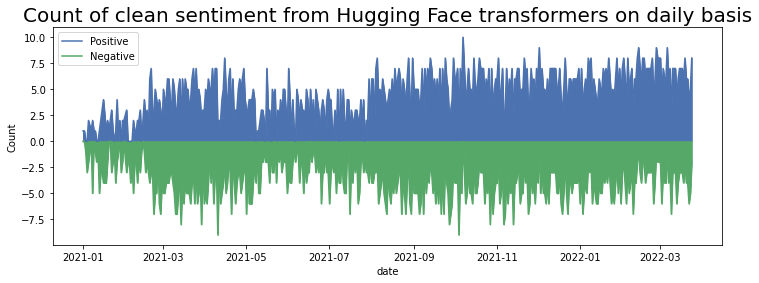

In [ ]:
Plt_data1= data[['date','Clean_Sentiment_HF']]
Pcounts= Plt_data1.loc[Plt_data1['Clean_Sentiment_HF'] =='POSITIVE']
Ncounts= Plt_data1.loc[Plt_data1['Clean_Sentiment_HF'] =='NEGATIVE']
X=Pcounts.groupby('date').count()
Y=Ncounts.groupby('date').count()
df1= pd.concat([X, Y,], axis=1,ignore_index = True)
df1[1]=df1[1]*-1
#Plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
fig, axs = plt.subplots(figsize=(12, 4))
df1.plot.area(ax=axs)
axs.set_ylabel("Count")
fig = plt.gcf()
plt.legend(['Positive','Negative'])
plt.title('Count of clean sentiment from Hugging Face transformers on daily basis',
          fontsize=20,
          color="black")
plt.show()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

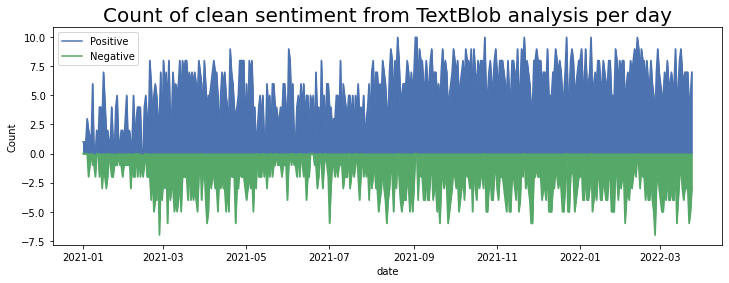

In [ ]:
Plt_data1= data[['date','Clean_Sentiment_TB']]
Pcounts= Plt_data1.loc[Plt_data1['Clean_Sentiment_TB'] =='POSITIVE']
Ncounts= Plt_data1.loc[Plt_data1['Clean_Sentiment_TB'] =='NEUTRAL']
X=Pcounts.groupby('date').count()
Y=Ncounts.groupby('date').count()
df1= pd.concat([X, Y,], axis=1,ignore_index = True)
df1[1]=df1[1]*-1
#Plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
fig, axs = plt.subplots(figsize=(12, 4))
df1.plot.area(ax=axs)
axs.set_ylabel("Count")
fig = plt.gcf()
plt.legend(['Positive','Negative'])
plt.title('Count of clean sentiment from TextBlob analysis per day',
          fontsize=20,
          color="black")
plt.show()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

**NOTE** : *Using a 3 class sentiment analysis has improved the analysed sentiments to a greater extent* 

##  SECTION 4 :


> ADDITIONAL ANALYSIS

This section contains the code for generating and processing the data for performing additional analysis to get deeper insights to the NFT market

NOTE : REFER TO THE PYTHON FILE NAMED : additional_analysis.py for looking at these interesting insights. 





Here we try to obtain further insights from the scraped data to understand the nft markets and valuations. The following are some of the studies that can be made

1.  Finding the number of unqiue users whose tweets regarding nfts became trending. and find out the frequency of times they made to the daily top 10 category

2.  Finding the Influence of social media features on the valuation of NFT collection

3. Find out the top performing hastags in the daily top 10 list

4. Find if there are any patterns in the positve sentiment tweets and negative sentiment tweets

5. Find out the location from where most number of trending NFTs are posted

6. Relation between the variation in the price of ETH and popularity of NFTs ( ie. are people trying tot covert ETH to NFTs when the price of Etherum dips and vice versa) etc..


ALL THE ABOVE MENTIONED ANALYSIS IN DETAIL CAN BE FOUND IN THE PYTHON FILE NAMED : Additional_Analysis.py

#### 1. Finding the most frequent Hastags and Usernames

In [ ]:
# finding the number of unique users that made to daily top 10
n_unique_users = SA_data['username'].nunique()
print("The number of unique users that made to the daily top 10 list is: ", n_unique_users)

The number of unique users that made to the daily top 10 list is:  1938


In [ ]:
# get top 20 most frequent users
n = 20
top_20_users = SA_data['username'].value_counts()[:n]
top_20_users

pranksy            50
opensea            49
superrare          36
decentraland       35
dielamaharanie     31
madmaraca          23
guttykreum         22
axieinfinity       16
thebakaarts        16
jparkedart         15
petertarka         14
cathsimard_        14
stuz0r             14
ouchieaxiebot      13
dario_desiena      12
archannair         12
eddiegangland      12
danieltaylorart    12
dakuklev           11
mbsjq              11
Name: username, dtype: int64

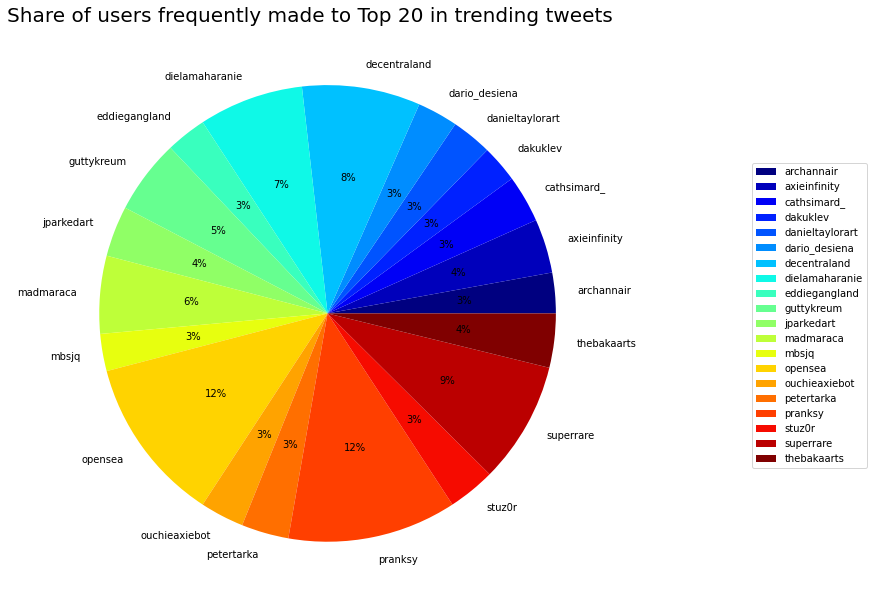

In [ ]:
dataframe = pd.DataFrame(top_20_users)
  
# Plotting the pie chart for above dataframe
n = 20
colors = plt.cm.jet(np.linspace(0,1,n))
dataframe.groupby(top_20_users.index.values).sum().plot(kind='pie', y='username', autopct='%1.0f%%',colors=colors)
#plt.legend(bbox_to_anchor=(0.85,1.025), loc="left")
plt.legend( bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.ylabel('')
plt.title('Share of users frequently made to Top 20 in trending tweets',
          fontsize=20,
          color="black",loc='right')
fig = plt.gcf()
fig.set_size_inches(15.5, 10.5)
fig.savefig('test2png.png', dpi=100)

In [ ]:
SA_data.to_csv('/content/drive/MyDrive/NFT_twitter/Submission_twint_1_year/SA_data_1_year.csv', index=False)

In [ ]:
for i in range(len(SA_data['hashtags'])):
  for character in '[ ]':
    SA_data['hashtags'][i] = str(SA_data['hashtags'][i]).replace(character, '')
  SA_data['hashtags'][i]= list(SA_data['hashtags'][i].split(","))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Finding the top performing hashtags
hash = []
for i in range(len(SA_data['hashtags'])):

  for j in range(len(SA_data['hashtags'][i])):
    hash.append(SA_data['hashtags'][i][j])
hash = pd.Series(hash)
n_unique_hash = hash.nunique()
print("The number of unique hashtags that made to the daily top 10 list is: ", n_unique_hash)
Hash = []
for i in range(len(hash)):
  if hash[i] != '':
    Hash.append(hash[i])
Hash = pd.Series(Hash)
n = 20
top_20_hash = Hash.value_counts()[:n]
top_20_hash

The number of unique hashtags that made to the daily top 10 list is:  1151


'nft'                1210
'nfts'                629
'nftcommunity'        580
'nftart'              466
'cryptoart'           465
'nftcollector'        362
'nftartist'           227
'nftdrop'             172
'nftgiveaway'         170
'nftcollectors'       167
'openseanft'          164
'opensea'             152
'nftthailand'         118
'nftcollection'       108
'nftartists'           79
'superrare'            70
'eth'                  69
'nftcollectibles'      59
'giveaway'             54
'nftcommmunity'        51
dtype: int64

##### 2. Merging the User Information of the top performing users with correspodning tweets . This will be used to analyse the infuence of social media features on the NFT valuation 

In [ ]:
user_info = pd.read_csv('/content/drive/MyDrive/NFT_twitter/Submission_twint_1_year/user_info_1_year.csv')
user_info['username'] = user_info['username'].str.lower()




In [ ]:
data = pd.merge(SA_data, user_info, on='username', how='outer')
data = data.dropna(subset=['date'])


In [ ]:
# grouping SA_data by date for further analysis
daily_top_10 = data.groupby('date')
dates = list(daily_top_10.groups.keys())

In [ ]:
import datetime
# we can get all the information of the top 10 tweets and the username who posted the corresponfing tweet on any date by using just the prefered date. The following is just ana examle
daily_top_10.get_group(datetime.date(2021,9,10))

,date,username,urls,hashtags,replies_count,retweets_count,likes_count,tweet,language,marketplace,...,join_time,tweets,following,followers,likes,media,private,verified,profile_image_url,background_image
829,2021-09-10,tayl0rwtf,https://opensea.io/assets/0x48cdecf8ccadddd95b...,['nfts'],378,326,438,🚨ANOTHER NFT GIVEAWAY!!!!🚨 @LemurLemurNFT ha...,en,opensea,...,19:15:02 UTC,14692.0,3328.0,42129.0,46133.0,1751.0,False,False,https://pbs.twimg.com/profile_images/150682309...,https://pbs.twimg.com/profile_banners/12686221...
2247,2021-09-10,spacepunksclub,https://opensea.io/collection/space-punks-club,"['spc', 'sdc', 'nft']",26,111,260,T-MINUS 40MIN TO DINO EGG CLAIM 🔥 #SPC #SDC #N...,en,opensea,...,16:27:27 UTC,2131.0,6790.0,45783.0,6327.0,458.0,False,False,https://pbs.twimg.com/profile_images/145786934...,https://pbs.twimg.com/profile_banners/14240444...
2296,2021-09-10,changmonsters,https://opensea.io/collection/ozzynft,"['ozzynft', 'nfts', 'nftcommunity', 'nftdrops'...",11,394,296,🔥 New Collection Pre-sale 🔥 🦎Ozzy NFT🦎 ⚡️No.1-...,en,opensea,...,15:08:42 UTC,14262.0,1873.0,4613.0,2869.0,448.0,False,False,https://pbs.twimg.com/profile_images/149952008...,https://pbs.twimg.com/profile_banners/14117029...
2383,2021-09-10,instant_onion,https://superrare.com/artwork-v2/easier-days-2...,[],10,205,995,'Easier Days' 🌥️📻 now taking offers on @SuperR...,en,superrare,...,15:33:33 UTC,21543.0,2041.0,48962.0,78424.0,1066.0,False,False,https://pbs.twimg.com/profile_images/147843477...,https://pbs.twimg.com/profile_banners/12463575...
2600,2021-09-10,natechastain,http://opensea.io/account,[],184,233,1485,✨New at OpenSea: Counter-Offers We now enabl...,en,opensea,...,00:25:59 UTC,3476.0,950.0,38966.0,2714.0,119.0,False,False,https://pbs.twimg.com/profile_images/148465984...,NaN
2604,2021-09-10,3dskullpunks,https://opensea.io/assets/0x495f947276749ce646...,"['nfts', 'nftcommunity', 'nftgiveaway', 'nftco...",369,327,392,💀⚠️NFT GIVEAWAY ⚠️💀 Follow and like Retweet T...,en,opensea,...,22:50:59 UTC,902.0,276.0,1173.0,1708.0,251.0,False,False,https://pbs.twimg.com/profile_images/139680097...,https://pbs.twimg.com/profile_banners/13860902...
2606,2021-09-10,iamrwr2,https://superrare.com/artwork-v2/resilience-28298,[],34,68,322,"Happy Friday 🖤 My latest piece, ‘Resilience’,...",en,superrare,...,00:48:19 UTC,11748.0,1412.0,8869.0,21308.0,347.0,False,False,https://pbs.twimg.com/profile_images/144877629...,https://pbs.twimg.com/profile_banners/13419084...
2611,2021-09-10,jguzmannnn,https://opensea.io/collection/awakening-,[],20,65,318,"Oasis, the first 1/1 piece from my GENESIS ser...",en,opensea,...,21:26:02 UTC,16090.0,386.0,13671.0,56147.0,1161.0,False,False,https://pbs.twimg.com/profile_images/150641118...,https://pbs.twimg.com/profile_banners/19452142...
2612,2021-09-10,02works_nft,https://opensea.io/assets/0x495f947276749ce646...,"['nfts', 'nftcollection']",43,108,310,✨New drop✨ Couple#1👩‍❤️‍👨 https://t.co/UEu0...,en,opensea,...,00:35:32 UTC,3301.0,214.0,4401.0,6823.0,321.0,False,False,https://pbs.twimg.com/profile_images/143286550...,https://pbs.twimg.com/profile_banners/14328646...
2613,2021-09-10,jarvinart,https://superrare.com/artwork-v2/down-the-abys...,[],13,63,262,Accepting offers on “Down the Abyss” now✨ htt...,en,superrare,...,13:53:48 UTC,24239.0,1227.0,18932.0,44493.0,1508.0,False,False,https://pbs.twimg.com/profile_images/150018551...,https://pbs.twimg.com/profile_banners/13736338...


#### 3. Generating data for estimate the corelation between social media features and nft floor prices of collections listed at opensea

In [ ]:
#selecting nfts listed on opensea marketplace
opensea_tweets_1_year  = data.drop(data[data['marketplace'] != 'opensea' ].index , axis = 0)
opensea_tweets_1_year.reset_index(inplace = True)

In [ ]:
opensea_tweets_1_year.to_csv('/content/drive/MyDrive/NFT_twitter/Submission_twint_1_year/opensea_tweets_1_year.csv', index=False)


In [ ]:
opensea_tweets_1_year
del opensea_tweets_1_year['index']

In [ ]:
n = 20
top_20_users = data['username'].value_counts()[:n]
top_20_users

pranksy            50
opensea            49
superrare          36
decentraland       35
dielamaharanie     31
madmaraca          23
guttykreum         22
axieinfinity       16
thebakaarts        16
jparkedart         15
petertarka         14
cathsimard_        14
stuz0r             14
ouchieaxiebot      13
dario_desiena      12
archannair         12
eddiegangland      12
danieltaylorart    12
dakuklev           11
mbsjq              11
Name: username, dtype: int64

Selecting opensea collections from the opensea data because looking at the average price of the collection and comparing the prices with social media features would be better than including the indivual assest becuse probability of price of single asset being incluenced by random events would be more when compared to probability of average/median price of a collection being influenced by random events


In [ ]:
opensea_collections_1_year = opensea_tweets_1_year.drop(opensea_tweets_1_year[opensea_tweets_1_year['marketplace'] != 'collection' ].index , axis = 0)
opensea_tweets_1_year.reset_index(inplace = True)


In [ ]:
import re
collection = []
collection_name = []
urls = opensea_tweets_1_year['urls'].values.tolist()
for i in range(len(urls)):
  keyword = 'collection'
  delimiter = re.compile(r"/|[?]")
  a = keyword in delimiter.split(urls[i])
  split_url = delimiter.split(urls[i])
  if a:
    for j in range(len(split_url)):
      if split_url[j] == 'collection':
        collection_name.append(split_url[j+1])
        break
  else:
    collection_name.append('nocollection')

    

  collection.append(bool(a))

opensea_tweets_1_year['collection'] = collection
opensea_tweets_1_year['collection name'] = collection_name
#dropping the tweets if it doesn't have nft market-place link
opensea_collection_1_year = opensea_tweets_1_year.drop(opensea_tweets_1_year[opensea_tweets_1_year['collection'] == False].index , axis = 0)
opensea_collection_1_year.reset_index(inplace = True)


In [ ]:
del opensea_collection_1_year['level_0']
del opensea_collection_1_year['index']
opensea_collection_1_year.head(5)

,date,username,urls,hashtags,replies_count,retweets_count,likes_count,tweet,language,marketplace,...,following,followers,likes,media,private,verified,profile_image_url,background_image,collection,collection name
0,2022-03-24,aquanft,https://opensea.io/collection/skulltoonsbytheo...,['skulltakeover'],233,1690,1689,OMG @SkulltoonsNFT reveal GOES CRAZY 🤯 😱 💎 Go...,en,opensea,...,283.0,100237.0,251.0,11.0,False,False,https://pbs.twimg.com/profile_images/150616848...,https://pbs.twimg.com/profile_banners/13550808...,True,skulltoonsbytheodoru
1,2022-03-24,cryptoarthur92,http://opensea.io/collection/the-lamp-project,"['nft', 'nftcollection', 'nftcommunity', 'dyor']",6,318,361,Debut Artist Project: The Lamp Project - Colle...,en,opensea,...,10864.0,154919.0,12481.0,165.0,False,False,https://pbs.twimg.com/profile_images/148710350...,https://pbs.twimg.com/profile_banners/20007019...,True,the-lamp-project
2,2022-03-21,cryptoarthur92,https://opensea.io/collection/appalachiaprep,"['nfa', 'dyor']",4,475,525,This is the first major high school football d...,en,opensea,...,10864.0,154919.0,12481.0,165.0,False,False,https://pbs.twimg.com/profile_images/148710350...,https://pbs.twimg.com/profile_banners/20007019...,True,appalachiaprep
3,2022-03-24,shryxsi,http://opensea.io/collection/skulltoonsbytheodoru,['skulltakeover'],217,83,226,YESSIR @SkulltoonsNFT reveal IS GOING CRAZY FR...,en,opensea,...,1075.0,215359.0,2487.0,4.0,False,False,https://pbs.twimg.com/profile_images/150711914...,https://pbs.twimg.com/profile_banners/14976645...,True,skulltoonsbytheodoru
4,2022-03-24,fishmanslabs,https://opensea.io/collection/fishmanslaboratory,[],32,59,160,The Time has Finally come Finions. I hope you ...,en,opensea,...,4.0,123193.0,8782.0,86.0,False,False,https://pbs.twimg.com/profile_images/149431499...,https://pbs.twimg.com/profile_banners/14813242...,True,fishmanslaboratory


In [ ]:
opensea_collection_1_year.to_csv('/content/drive/MyDrive/NFT_twitter/Submission_twint_1_year/opensea_collection_1_year.csv', index = False)

The NFT collections identified in this CSV file will be used to scrape the average floor price of the NFT collections from the opensea using the opensea_scrape,py python notebook. Then the collected price of the collectetion was added to this data and used for gaining deeper insights to the NFT markets and the valuation of the NFT collections. 
This data together is later used in Additonal_analysis.py to look at how the social media features of an NFT collection gives an insight to the valuation of a particular NFT collection.


---





> FUTURE DIRECTIONS:



1. Similar analysis like the one done in the Additional_analysis.ipynb can be extended to datacollected from different sources and can be used to model the  average valuation of an NFT collection. This can be used to identify overvalued and undervalued NFTs from a collection.

2. Another observation I made was that most of the tweets on NFTs were like NFT promotions using GiVEAWAYS. I guess these are done to gain more reach and popularity for theior collections. we can collect corresponding data from twitter and opensea using opensea API to look at how the valuation of the users's NFT collections vary over a period before and after these promotion stratergies and then these isights can also be used to develop better stratergies in promoting an NFTs collection.


PLEASE LOOK AT Additional_Analaysis.Ipynb TO LOOK AT SOME INTERESTING INSIGHTS FROM THE COLECTED DATA.